In [1]:
from google.colab import drive
drive.mount('/content/drive')
loan_path = "/content/drive/My Drive/Perpay Data Challenge/loan_dataset.csv"
user_path = "/content/drive/My Drive/Perpay Data Challenge/user_dataset.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
loan = pd.read_csv(loan_path)
user = pd.read_csv(user_path)

In [32]:
loan.head()


,loan_id,user_id,amount,number_of_payments,user_pinwheel_eligible_at_ap,approval_type,application_start_ts,application_complete_ts,awaiting_payment_ts,repayment_ts,canceled_ts,cancellation_type,risk_tier_at_uw
0,27f95ba4-e56f-4222-bc92-d73bf8d7d669,beca750a-2041-4c26-8154-6aa85ae9b245,471.48,8.0,0,NaN,2020-10-13 00:04:43.64499,2020-10-13 00:08:29.744502,NaN,NaN,2020-11-03 06:00:09.020005,automated.verification,T0
1,040d9651-3ef2-46ed-9e28-6ad12bf00585,3401d86c-898b-4d6f-ba67-08b2bc005d5f,309.98,8.0,0,NaN,2020-10-13 00:24:50.475201,NaN,NaN,NaN,2020-10-27 09:00:09.906958,automated.application_started,T0
2,71a279d5-5bce-4ea2-9e98-ec9d994256b1,ef4ed8ea-17a4-4f41-a1fd-84b6fe09751f,523.98,8.0,1,underwriting.auto.ftb_decision,2020-10-13 00:26:48.749278,2020-10-13 00:27:53.698868,2020-10-13 12:19:55.282708,NaN,2021-02-11 06:30:08.28502,automated.awaiting_payment,T0
3,706b5235-8424-4e91-b813-328dc5603e8e,1fa64260-49bf-474e-8800-893c0c455a06,369.96,4.0,0,NaN,2020-10-13 01:08:06.763585,NaN,NaN,NaN,2020-10-27 09:00:08.296637,automated.application_started,T0
4,d850645f-a7fe-4cd1-97db-8f1ac1364a67,90f815e9-c931-4d9e-aa79-f136bc5f227c,479.98,8.0,0,NaN,2020-10-13 01:10:40.530583,NaN,NaN,NaN,2020-10-27 09:00:08.090965,automated.application_started,T0


In [33]:
loan.shape

(39012, 13)

In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39012 entries, 0 to 39011
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_id                       39012 non-null  object 
 1   user_id                       39012 non-null  object 
 2   amount                        39012 non-null  float64
 3   number_of_payments            37066 non-null  float64
 4   user_pinwheel_eligible_at_ap  39012 non-null  int64  
 5   approval_type                 23305 non-null  object 
 6   application_start_ts          39012 non-null  object 
 7   application_complete_ts       27164 non-null  object 
 8   awaiting_payment_ts           18275 non-null  object 
 9   repayment_ts                  1499 non-null   object 
 10  canceled_ts                   36295 non-null  object 
 11  cancellation_type             36255 non-null  object 
 12  risk_tier_at_uw               39012 non-null  object 
dtypes

In [34]:
user.head()


,user_id,signup_dt,company_name,spending_limit_est,valid_phone_ind,last_login,was_referred_ind,first_paystub_dt,first_application_start_ts,first_application_complete_ts,first_awaiting_payment_ts,first_repayment_ts
0,5f477f7c-3367-4bee-ba2c-f3b39a24c7cc,2020-10-13 00:06:21.603537,Other > Add a new company,1000.0,1,2022-11-22 01:21:08.832662,0,NaN,NaN,NaN,NaN,NaN
1,2752a3f2-0a96-42f9-bcc3-5fde7edec06b,2020-10-13 00:12:20.590843,Other > Add a new company,700.0,1,2020-12-31 01:50:17.564992,0,NaN,2020-12-31 01:50:18.097958,NaN,NaN,NaN
2,7d8072a0-0c99-4eb7-8c6f-2c7d54ba52c7,2020-10-13 00:15:26.586054,NaN,NaN,0,2020-10-13 00:15:27.200942,0,NaN,NaN,NaN,NaN,NaN
3,0067c279-3b94-4867-ae51-aa182cfc8dc3,2020-10-13 00:17:16.041499,Other > Add a new company,NaN,1,2020-10-27 15:27:35.952604,0,NaN,NaN,NaN,NaN,NaN
4,972e17fd-95b5-4bcc-8f17-c4323abd6c7b,2020-10-13 00:21:46.310764,NaN,NaN,0,2020-10-13 00:21:46.398749,0,NaN,NaN,NaN,NaN,NaN


In [35]:
user.shape

(95575, 12)

In [5]:
#outer join dataset by user_id because very little columns overlap --> not necessary to join table for EDA
#profiling the user
  #active vs inactive --> last_login >= 2022 only?
  #application start, application finish --> average time taken to finish loan application process --> can account for ppl with multiple loan apps completed by getting avg of all loans they completed,
      # create new column with time taken from start to end, group by user id, aggregate columns by avg time taken
  #how many users default on their loan aka. cancel loan column  #since most users using perpay are likely to be ppl who can't build their credit easily
        # --> maybe expect more users in the dataset to default?
        #




In [38]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95575 entries, 0 to 95574
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        95575 non-null  object 
 1   signup_dt                      95575 non-null  object 
 2   company_name                   86027 non-null  object 
 3   spending_limit_est             69055 non-null  float64
 4   valid_phone_ind                95575 non-null  int64  
 5   last_login                     95575 non-null  object 
 6   was_referred_ind               95575 non-null  int64  
 7   first_paystub_dt               8839 non-null   object 
 8   first_application_start_ts     25105 non-null  object 
 9   first_application_complete_ts  18948 non-null  object 
 10  first_awaiting_payment_ts      14388 non-null  object 
 11  first_repayment_ts             1524 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usag

In [36]:
user_and_loan = pd.concat([user, loan], join = "outer")
user_and_loan.head()
user_and_loan.info()
#user_and_loan["last_login"].unique() #where the users work
#no need to join data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134587 entries, 0 to 39011
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        134587 non-null  object 
 1   signup_dt                      95575 non-null   object 
 2   company_name                   86027 non-null   object 
 3   spending_limit_est             69055 non-null   float64
 4   valid_phone_ind                95575 non-null   float64
 5   last_login                     95575 non-null   object 
 6   was_referred_ind               95575 non-null   float64
 7   first_paystub_dt               8839 non-null    object 
 8   first_application_start_ts     25105 non-null   object 
 9   first_application_complete_ts  18948 non-null   object 
 10  first_awaiting_payment_ts      14388 non-null   object 
 11  first_repayment_ts             1524 non-null    object 
 12  loan_id                        

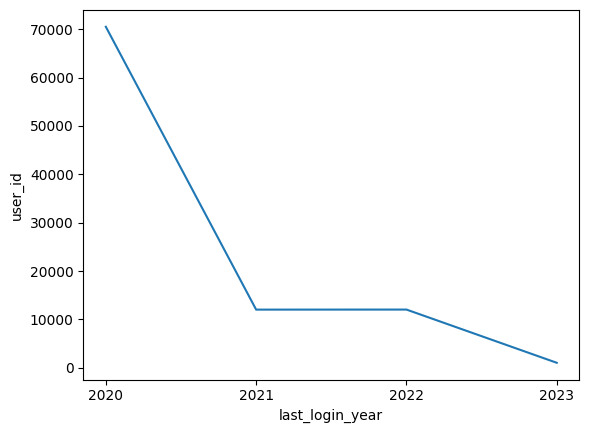

In [26]:
activeUser = user
activeUser['last_login_year'] = user["last_login"].str.extract(r'(\d{4})')
activeUser['last_login_month'] = user["last_login"].str.extract(r"(?<=\d{4}-)(\d{2})")
activeUser['last_login_year'] = activeUser["last_login_year"].astype(int)
activeUser['last_login_month'] = activeUser["last_login_month"].astype(int)
seaborn = sns.lineplot(data= plot, x="last_login_year", y="user_id")
seaborn.set_xticks(range(2020, 2024, 1)) #min login year, max login year -- i just hardcoded the values in
plt.show()


In [29]:
lastLogin = activeUser.groupby(['last_login_year']).count()
lastLogin
lastLogin.filter(items=['user_id'])

,user_id
last_login_year,
2020,70493
2021,12020
2022,12032
2023,1030


In [41]:
#Proportion of number of loans cancelled vs all loans in dataset
36255/ 39012

0.929329437096278

In [9]:
loan["cancellation_type"].unique()

array(['automated.verification', 'automated.application_started',
       'automated.awaiting_payment', 'spending_limit_exceeded',
       'qualify_test', 'remorse', 'didnt_realize_direct_deposit',
       'deposit_failure', 'accident', 'automated.pending',
       'duplicate_order', 'other_interests', nan, '1_covid_elevated_risk',
       'magento.edit_order.cancel', 'purchased_elsewhere',
       'automated.deactivate_user_request', 'deny'], dtype=object)

In [10]:
cancelReasonCount = loan['cancellation_type'].value_counts()
cancelReasonCount

automated.awaiting_payment           9715
automated.application_started        7996
automated.pending                    4455
remorse                              3499
qualify_test                         2345
accident                             2065
other_interests                      1649
deposit_failure                      1229
didnt_realize_direct_deposit          688
automated.verification                563
purchased_elsewhere                   507
spending_limit_exceeded               505
magento.edit_order.cancel             437
duplicate_order                       418
1_covid_elevated_risk                 143
automated.deactivate_user_request      40
deny                                    1
Name: cancellation_type, dtype: int64

In [11]:
cancelReason = loan[loan["cancellation_type"].notna()]
cancelReason.shape #36255
#4455+ 7996 + 9715  22166


(36255, 13)

36255 loans were cancelled

The top 3 reasons why loans were being canceled was because of automated awaiting payments 9715/
automated.application_started        7996
automated.pending                    4455

Around 13% of users in the dataset were last logged in in the year 2022.

In [12]:
user_and_loan["risk_tier_at_uw"].unique()
#Why are these values either null or T0?

array([nan, 'T0'], dtype=object)

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39012 entries, 0 to 39011
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_id                       39012 non-null  object 
 1   user_id                       39012 non-null  object 
 2   amount                        39012 non-null  float64
 3   number_of_payments            37066 non-null  float64
 4   user_pinwheel_eligible_at_ap  39012 non-null  int64  
 5   approval_type                 23305 non-null  object 
 6   application_start_ts          39012 non-null  object 
 7   application_complete_ts       27164 non-null  object 
 8   awaiting_payment_ts           18275 non-null  object 
 9   repayment_ts                  1499 non-null   object 
 10  canceled_ts                   36295 non-null  object 
 11  cancellation_type             36255 non-null  object 
 12  risk_tier_at_uw               39012 non-null  object 
dtypes

In [25]:
loan["user_id"].value_counts()

878dfd26-9fb9-4c64-8c3b-c8ce198e90bd    16
c1953798-8853-4222-af59-e87e118e223a    11
17c79457-eb70-4de3-8682-35e4c3116850    11
6c0284cf-b47d-437e-9fbe-01de24096e0e    11
5e303889-e3e6-4c99-8bc5-8a1fe2d9fab7     9
                                        ..
b1a138c4-f869-4842-8a2f-972970a7d865     1
82f2585a-8a63-4fd5-a5ef-7c8c2e416e13     1
1b01760a-0810-4f4e-8988-98874bd602f5     1
55b66afa-299a-4a4c-9753-de12bcbe245f     1
2ad3615a-81cf-4170-a036-c5a4c1eaeb11     1
Name: user_id, Length: 31656, dtype: int64

In [14]:
#approval type

In [15]:
loan["approval_type"].value_counts()

underwriting.auto.ftb_decision          17761
underwriting.manual_review               2740
underwriting.manual.verification         1106
underwriting.auto.deny                    920
underwriting.manual.approve               662
underwriting.manual.deny                  109
underwriting.manual.override_approve        4
underwriting.auto.approve                   3
Name: approval_type, dtype: int64

In [ ]:
#Total loans: 23305
920 + 109 #1029 loans denied
23305 - 1029 # 22276 loans approved
22276 / 23305

0.9558463848959451

In [ ]:
39012 - 23305

15707

In [ ]:
15707 / 39012

0.4026197067568953

In [ ]:
#Loan application conversion rate from start to finish
#application_start_ts          39012
#application_complete_ts       27164

#Loan abandonment rate: 11848/ 39012
11848/ 39012



0.3037014252025018

In [23]:
#Average time taken to finish loan application process
avgLoan = loan
avgLoan['date1'] = pd.to_datetime(avgLoan['application_start_ts'], format='%Y-%m-%d %H:%M:%S.%f')
avgLoan['date2'] = pd.to_datetime(avgLoan['application_complete_ts'], format='%Y-%m-%d %H:%M:%S.%f')
avgLoan['loan_completed_in_minutes'] = (avgLoan['date2'] - avgLoan['date1']).dt.seconds / 60
avgLoan = avgLoan[avgLoan["loan_completed_in_minutes"].notna()]
mean = avgLoan["loan_completed_in_minutes"].mean()
median = avgLoan["loan_completed_in_minutes"].median()
print("Average time taken in minutes to complete loan application: {}".format(mean))
print("Median time taken in minutes to complete loan application: {}".format(median))

Average time taken in minutes to complete loan application: 22.11926385412065
Average time taken in minutes to complete loan application: 0.8666666666666667


In [42]:
avgLoan.head()


,loan_id,user_id,amount,number_of_payments,user_pinwheel_eligible_at_ap,approval_type,application_start_ts,application_complete_ts,awaiting_payment_ts,repayment_ts,canceled_ts,cancellation_type,risk_tier_at_uw,date1,date2,loan_completed_in_minutes
0,27f95ba4-e56f-4222-bc92-d73bf8d7d669,beca750a-2041-4c26-8154-6aa85ae9b245,471.48,8.0,0,NaN,2020-10-13 00:04:43.64499,2020-10-13 00:08:29.744502,NaN,NaN,2020-11-03 06:00:09.020005,automated.verification,T0,2020-10-13 00:04:43.644990,2020-10-13 00:08:29.744502,3.766667
2,71a279d5-5bce-4ea2-9e98-ec9d994256b1,ef4ed8ea-17a4-4f41-a1fd-84b6fe09751f,523.98,8.0,1,underwriting.auto.ftb_decision,2020-10-13 00:26:48.749278,2020-10-13 00:27:53.698868,2020-10-13 12:19:55.282708,NaN,2021-02-11 06:30:08.28502,automated.awaiting_payment,T0,2020-10-13 00:26:48.749278,2020-10-13 00:27:53.698868,1.066667
8,e8998cbb-37ab-4180-93e9-d22b7855665f,d000f3eb-50f3-482e-b7dc-0ab33e642d36,119.98,16.0,1,underwriting.auto.ftb_decision,2020-10-13 02:39:53.554854,2020-10-13 02:41:07.58123,2020-10-13 02:41:12.924726,NaN,2020-10-22 01:02:19.585083,remorse,T0,2020-10-13 02:39:53.554854,2020-10-13 02:41:07.581230,1.233333
9,0004ff34-d655-4f25-9104-6e108f454a13,adb97add-9381-45f0-b31b-78687ce88bcb,509.98,8.0,0,underwriting.auto.ftb_decision,2020-10-13 02:53:08.831158,2020-10-13 02:58:08.171288,2020-10-13 02:59:35.127466,NaN,2020-10-16 06:24:13.708774,didnt_realize_direct_deposit,T0,2020-10-13 02:53:08.831158,2020-10-13 02:58:08.171288,4.983333
11,6c4945bf-ed63-41ff-8fb8-641cb53310f3,957bd9b4-a70b-4eba-94b0-b75fd39e0635,953.19,16.0,1,underwriting.auto.ftb_decision,2020-10-13 03:22:20.637457,2020-10-13 03:25:10.48761,2020-10-13 11:47:52.548097,NaN,2021-02-11 06:30:09.929995,automated.awaiting_payment,T0,2020-10-13 03:22:20.637457,2020-10-13 03:25:10.487610,2.816667


In [43]:
#dealing with Nan values --> don't want to lose data

In [44]:
#how many loans enter repayment within 15 days

user_and_loan['date1'] = pd.to_datetime(user_and_loan['application_start_ts'], format='%Y-%m-%d %H:%M:%S.%f')
user_and_loan['date2'] = pd.to_datetime(user_and_loan['repayment_ts'], format='%Y-%m-%d %H:%M:%S.%f')
user_and_loan['date_diff_days'] = (user_and_loan['date2'] - user_and_loan['date1']).dt.days
user_and_loan = user_and_loan[user_and_loan["date_diff_days"].notna()]
user_and_loan.shape[0] #1499





1499

In [45]:
user_and_loan = user_and_loan[user_and_loan['date_diff_days'] <= 15]
user_and_loan.shape[0] #1039


1039

In [46]:
loan['date1'] = pd.to_datetime(loan['application_start_ts'], format='%Y-%m-%d %H:%M:%S.%f')
loan['date2'] = pd.to_datetime(loan['repayment_ts'], format='%Y-%m-%d %H:%M:%S.%f')
loan['date_diff_days'] = (loan['date2'] - loan['date1']).dt.days
loan = loan[loan["date_diff_days"].notna()]
loan.shape[0] #1499



1499

In [47]:
loan = loan[loan['date_diff_days'] <= 15]
loan.shape[0] #1499

1039

In [48]:
1039/1499

0.6931287525016678

With the given dataset, I filtered all the Nan values from the repayment_ts column, which decreased the dataset significantly from 39012 rows to only 1499 rows. Amongst the remaining data with 1499 rows,about 69% (1039/1499) of loans enter repayment within 15 days of approval.



